First import necessary packages

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def splice_from_file(filename):
    """
    Load the genome splice dataset to pandas DataFrame
    """
    df = pd.read_csv(filename)
    return df

In [32]:
def split_features(data):
    #data contains columns class, id and dna
    X = data
    #split nucleotid string (len=60) into a list of independent characters (DNA nucleotids)
    X['dna'] = X['dna'].map(lambda x : list(str(x).strip()))
    #create 60 new attributes (columns) for each DNA nucleotide index
    #each attribute has name dna_idx where idx is index (1-based) in the list above
    for idx in range(60):
        X['dna_%d' % (idx+1)] = X['dna'].map(lambda x : x[idx])
    #remove the old dna column (redundant information)
    del X['dna']
    #remove descriptor
    del X['id']
    
    return X

In [33]:
def get_splice_data():
    """
    Load the genome splice dataset, split it into X and y, and then call the label encoder
    to get an integer y column
    """
    
    df = pd.read_csv('splice.csv')
    #exclude class column to create X dataframe
    X = split_features(df)
    X.to_csv("splice_indexed.csv", index=False)
    X = df.drop(columns='class')
    #print(X.values)
    #dv = feature_extraction.DictVectorizer(sparse=False)
    #dv.fit(X)
    print(pd.get_dummies(X))

    
    y = df.reindex(columns=['class'])
    #print(y.values.reshape(-1,))
    y = preprocessing.LabelEncoder().fit_transform(y.values.reshape(-1,))
    
    print(y)
    
    return X,y

In [34]:
def separate_feature_class(data):
    y = data.reindex(columns=['class'])
    X = data.drop(columns='class')
    return X,y

In [40]:
def count_unique_percent(df):
    """returns fractions of the unique values in the dataset"""
    #flatten DataFrame to one dimensional array and convert it to Series object
    series = pd.Series(df.as_matrix().reshape(-1))
    #count unique values percentage
    series.value_counts()
    unique_counts_pct = series.value_counts(normalize=True)
    return unique_counts_pct

def get_odd_nucleotide_rows(df):
    """creates dictionary of rows containing odd (non ATCG nucleotide)
       key - non ATCG nucleotide
       value - list of rows containing non ATCG nucleotide
    """
    
    odd_dict = {}
    odd_dict['N'] = df[df == 'N'].dropna(how='all').index.values.reshape(-1)
    odd_dict['R'] = df[df == 'R'].dropna(how='all').index.values.reshape(-1)
    odd_dict['S'] = df[df == 'S'].dropna(how='all').index.values.reshape(-1)
    odd_dict['D'] = df[df == 'D'].dropna(how='all').index.values.reshape(-1)
    return odd_dict

def remove_odd_nucleotide_rows(df, odd_rows_dict):
    #concat dictionary values
    to_remove_idx = np.concatenate(list(odd_rows_dict.values()))
    return df.drop(index = to_remove_idx.tolist())

In [41]:
df = splice_from_file("data/splice_orig.csv")
df.columns = ['class', 'id', 'dna']

df.info()
df_split = split_features(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 3 columns):
class    3189 non-null object
id       3189 non-null object
dna      3189 non-null object
dtypes: object(3)
memory usage: 74.8+ KB


In [42]:
df_split_X, df_split_y = separate_feature_class(df_split)
count_unique_percent(df_split_X)



C    0.262784
G    0.262496
T    0.241967
A    0.232440
N    0.000293
D    0.000010
S    0.000005
R    0.000005
dtype: float64

In [44]:
odd_rows_dict = get_odd_nucleotide_rows(df_split_X)
df_filt = remove_odd_nucleotide_rows(df_split, odd_rows_dict)
df_filt_X, df_filt_y = separate_feature_class(df_filt)

In [94]:
pd.get_dummies(df_filt).groupby(['class_EI', 'class_IE', 'class_N']).sum(axis=0)[['dna_29_A', 'dna_29_T']]

dna_29_A  dna_29_T
class_EI class_IE class_N                    
0        0        1             400       414
         1        0             762         1
1        0        0             443        99

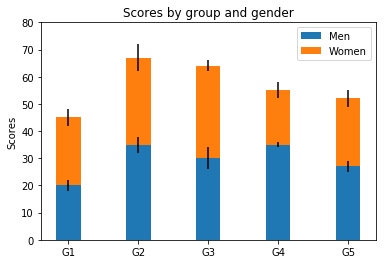

In [100]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('EI', 'IE', 'N'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()